Saving ev_adoption_dataset_clean.csv to ev_adoption_dataset_clean (2).csv
✅ Dataset 'ev_adoption_dataset_clean (2).csv' loaded successfully! Shape: (90, 12)

✨ Scaling features...
✅ Features scaled successfully!

✨ Training models...

✅ Model Comparison Summary:

               Model  R² Score           MAE          RMSE
0  Linear Regression     0.983  1.605183e+08  4.732382e+08
1      Random Forest    -0.018  9.358439e+08  3.642115e+09


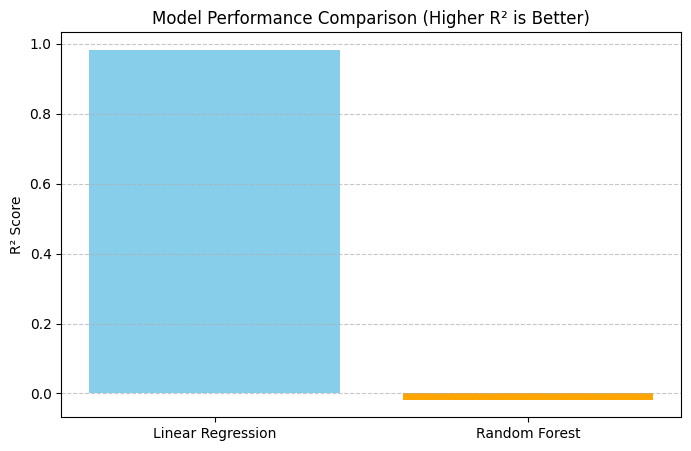


✔ Best model: Linear Regression
 ▆ Model comparison saved as: models/model_comparison_summary.csv
 ▤ Best model saved as: models/ev_policy_best_model.pkl
 ▤ Scaler saved as: models/scaler.pkl

✖ Week-2 task completed successfully!


In [3]:
# ---------------------------------------------------------------
# 🧠 Week-2: Model Training, Comparison, and Best Model Saving
# ---------------------------------------------------------------

import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# ---------------------------------------------------------------
# ♓ Step 1 — Load dataset
# ---------------------------------------------------------------
# To load from your PC, you will be prompted to upload the file.
# You can then select your 'ev_adoption_dataset_clean.csv' file (or similar).
from google.colab import files
uploaded = files.upload()

# Assuming you upload a single CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"✅ Dataset '{filename}' loaded successfully! Shape:", df.shape)

# Choose target and feature columns
target = "ev_vehicles_registered"   # ▓ Change if your target column differs (e.g., "Cost")
# Exclude 'country' and 'year' from features as they are non-numeric
features = [col for col in df.columns if col not in [target, "year", "country"]]

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------------
# ♓ Step 1.5 — Scale features
# ---------------------------------------------------------------
print("\n✨ Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames, preserving column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("✅ Features scaled successfully!")

# ---------------------------------------------------------------
# ♓ Step 2 — Train both models
# ---------------------------------------------------------------
print("\n✨ Training models...")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ---------------------------------------------------------------
# ♓ Step 3 — Evaluate both models
# ---------------------------------------------------------------
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return {
        "Model": name,
        "R² Score": round(r2, 3),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    }

results = pd.DataFrame([
    evaluate_model("Linear Regression", y_test, y_pred_lr),
    evaluate_model("Random Forest", y_test, y_pred_rf)
])

print("\n✅ Model Comparison Summary:\n")
print(results)

# ---------------------------------------------------------------
# ♓ Step 4 — Visualize model comparison
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["R² Score"], color=["skyblue", "orange"])
plt.title("Model Performance Comparison (Higher R² is Better)")
plt.ylabel("R² Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("model_comparison_plot.png", bbox_inches="tight")
plt.show()

# ---------------------------------------------------------------
# ♓ Step 5 — Save the best model and scaler
# ---------------------------------------------------------------
best_model_row = results.loc[results["R² Score"].idxmax()]
best_model_name = best_model_row["Model"]

if best_model_name == "Random Forest":
    best_model = rf
else:
    best_model = lr

# Create models directory
os.makedirs("models", exist_ok=True)

# Save model and its metrics
joblib.dump(best_model, "models/ev_policy_best_model.pkl")
joblib.dump(scaler, "models/scaler.pkl") # Save the scaler

# Save evaluation summary for reference
results.to_csv("models/model_comparison_summary.csv", index=False)

print(f"\n✔ Best model: {best_model_name}")
print(" ▆ Model comparison saved as: models/model_comparison_summary.csv")
print(" ▤ Best model saved as: models/ev_policy_best_model.pkl")
print(" ▤ Scaler saved as: models/scaler.pkl") # Added message for scaler

print("\n✖ Week-2 task completed successfully!")